# Imports

In [1]:
import json
from collections import Counter
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Data

In [2]:
data = json.loads(open('real2020.json', 'rb').read())['institutions']

In [3]:
counties = []

for institution in data:
    counties += [institution['objective']['location'].get('county')]

counties = sorted(set(counties))

### Number of institutions in dataset

In [4]:
len(data)

1471

### Distribution of variable I27 by county

In [5]:
toilets = {}
national = Counter()

for county in counties:
    toilets[county] = []
    
for institution in data:
    toilets[institution['objective']['location'].get('county')] += [institution['objective']['resources']['utilities']['toilets']]
        
for county in counties:
    toilets[county] = Counter(toilets[county])
    national += toilets[county]

toilets, national

({'ALBA': Counter({'Partial': 11, 'Nu': 2, 'Da': 24}),
  'ARAD': Counter({'Da': 32, 'Nu': 1, 'Partial': 10}),
  'ARGEŞ': Counter({'Da': 23, 'Partial': 18, 'Nu': 1}),
  'BACĂU': Counter({'Da': 25, 'Nu': 1, 'Partial': 8}),
  'BIHOR': Counter({'Da': 34, 'Partial': 17, 'Nu': 1}),
  'BISTRIŢA-NĂSĂUD': Counter({'Partial': 9, 'Da': 18}),
  'BOTOŞANI': Counter({'Da': 16, 'Partial': 12, 'Nu': 3}),
  'BRAŞOV': Counter({'Da': 40, 'Partial': 4}),
  'BRĂILA': Counter({'Da': 12, 'Partial': 8, 'Nu': 1}),
  'BUZĂU': Counter({'Da': 18, 'Partial': 14, 'Nu': 1}),
  'CARAŞ-SEVERIN': Counter({'Da': 26, 'Partial': 7}),
  'CLUJ': Counter({'Da': 50, 'Partial': 11, 'Nu': 1}),
  'CONSTANŢA': Counter({'Partial': 13, 'Da': 39, 'Nu': 1}),
  'COVASNA': Counter({'Da': 9, 'Partial': 8}),
  'CĂLĂRAŞI': Counter({'Da': 16, 'Partial': 3}),
  'DOLJ': Counter({'Da': 36, 'Partial': 10, 'Nu': 1}),
  'DÂMBOVIŢA': Counter({'Partial': 7, 'Da': 20, 'Nu': 2}),
  'GALAŢI': Counter({'Da': 19, 'Partial': 14, 'Nu': 2}),
  'GIURGIU': 

### Distribution of variable I55 by county

In [6]:
study_formations = {}

for county in counties:
    study_formations[county] = []
    
for institution in data:
    if institution['objective']['identity'].get('school_type') in ['Liceu teoretic', 'Colegiu Naţional']:
        for study_formation in institution['objective']['students']['study_formations']:
            if study_formation['type'] in ['Clasa a IX-a', 'Clasa a X-a', 'Clasa a XI-a', 'Clasa a XII-a']:
                if study_formation['student_count'] > 0 and study_formation['student_count'] < 100:
                    study_formations[institution['objective']['location'].get('county')] += [study_formation['student_count']]
        
for county in counties:
    study_formations[county] = np.mean(study_formations[county])
    
national = np.mean([study_formations[county] for county in counties if not np.isnan(study_formations[county])])
    
study_formations, national

/home/paubric/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/paubric/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


({'ALBA': 25.75206611570248,
  'ARAD': 24.13821138211382,
  'ARGEŞ': 28.85377358490566,
  'BACĂU': 28.050279329608937,
  'BIHOR': 25.30344827586207,
  'BISTRIŢA-NĂSĂUD': 26.476190476190474,
  'BOTOŞANI': 25.5390625,
  'BRAŞOV': 24.356828193832598,
  'BRĂILA': 27.136363636363637,
  'BUZĂU': 28.444444444444443,
  'CARAŞ-SEVERIN': 25.714285714285715,
  'CLUJ': 26.657894736842106,
  'CONSTANŢA': 27.733333333333334,
  'COVASNA': 21.426829268292682,
  'CĂLĂRAŞI': 28.675675675675677,
  'DOLJ': 26.506666666666668,
  'DÂMBOVIŢA': 25.584821428571427,
  'GALAŢI': 27.21212121212121,
  'GIURGIU': 20.5,
  'GORJ': 27.65714285714286,
  'HARGHITA': 23.472727272727273,
  'HUNEDOARA': 24.132867132867133,
  'IALOMIŢA': 27.555555555555557,
  'IAŞI': 26.698473282442748,
  'ILFOV': nan,
  'MARAMUREŞ': 24.83050847457627,
  'MEHEDINŢI': 25.098765432098766,
  'MUNICIPIUL BUCUREŞTI': 27.547687861271676,
  'MUREŞ': 25.16842105263158,
  'NEAMŢ': 25.21985815602837,
  'OLT': 26.8109756097561,
  'PRAHOVA': 26.9316770

### Distribution of variable I80 by county

In [7]:
dropout = {}

for county in counties:
    dropout[county] = []
    
for institution in data:
    if institution['objective']['identity'].get('school_type') in ['Liceu teoretic', 'Colegiu Naţional']:
        if institution['objective']['students']['flux'].get('dropouts') and institution['objective']['students']['flux'].get('registered_initially'):
            dropout[institution['objective']['location'].get('county')] += [institution['objective']['students']['flux'].get('dropouts') / institution['objective']['students']['flux'].get('registered_initially')]
        
for county in counties:
    dropout[county] = np.mean(dropout[county]) * 100
    
national = np.mean([dropout[county] for county in counties if not np.isnan(dropout[county])])
    
dropout, national

({'ALBA': 0.43898683803786487,
  'ARAD': 2.392922142062782,
  'ARGEŞ': 0.22573717106611096,
  'BACĂU': 1.4077446363212427,
  'BIHOR': 1.8596717550773645,
  'BISTRIŢA-NĂSĂUD': 0.21604179047281666,
  'BOTOŞANI': 8.24136604269636,
  'BRAŞOV': 0.8794299411523947,
  'BRĂILA': 2.7500456439111023,
  'BUZĂU': 0.4325000413616986,
  'CARAŞ-SEVERIN': 0.48392477284238805,
  'CLUJ': 0.8948292414385747,
  'CONSTANŢA': nan,
  'COVASNA': 0.4464285714285714,
  'CĂLĂRAŞI': nan,
  'DOLJ': 3.2694318099549027,
  'DÂMBOVIŢA': 1.0786326681947793,
  'GALAŢI': 0.4376412073533475,
  'GIURGIU': 0.7859165655267604,
  'GORJ': 0.4569370318591767,
  'HARGHITA': 2.693945846383804,
  'HUNEDOARA': 21.18531424706639,
  'IALOMIŢA': 0.8332994947414827,
  'IAŞI': 1.4883125780197337,
  'ILFOV': nan,
  'MARAMUREŞ': 2.0588235294117645,
  'MEHEDINŢI': 2.8238079011137516,
  'MUNICIPIUL BUCUREŞTI': 1.1264322395628164,
  'MUREŞ': nan,
  'NEAMŢ': 2.1514560045009223,
  'OLT': 1.5325451256012446,
  'PRAHOVA': 1.2086061859653485,
  '

### Distribution of variable I05 by county

In [8]:
construction_year = {}

for county in counties:
    construction_year[county] = []
    
for institution in data:
    if institution['objective']['identity'].get('school_type') in ['Liceu teoretic', 'Colegiu Naţional']:
        for building in institution['objective']['resources']['buildings']:
            construction_year[institution['objective']['location'].get('county')] += [building['construction_year']]
        
for county in counties:
    construction_year[county] = np.mean(construction_year[county])
    
national = np.mean([construction_year[county] for county in counties if not np.isnan(construction_year[county])])
    
construction_year, national

({'ALBA': 1955.433962264151,
  'ARAD': 1936.3513513513512,
  'ARGEŞ': 1969.483870967742,
  'BACĂU': 1965.859649122807,
  'BIHOR': 1960.4025974025974,
  'BISTRIŢA-NĂSĂUD': 1967.34375,
  'BOTOŞANI': 1971.4888888888888,
  'BRAŞOV': 1942.9857142857143,
  'BRĂILA': 1975.64,
  'BUZĂU': 1958.7551020408164,
  'CARAŞ-SEVERIN': 1954.75,
  'CLUJ': 1947.4639175257732,
  'CONSTANŢA': 1952.0,
  'COVASNA': 1942.2857142857142,
  'CĂLĂRAŞI': 1976.4285714285713,
  'DOLJ': 1970.0619469026549,
  'DÂMBOVIŢA': 1966.063492063492,
  'GALAŢI': 1972.820512820513,
  'GIURGIU': 1969.3809523809523,
  'GORJ': 1977.5142857142857,
  'HARGHITA': 1967.775,
  'HUNEDOARA': 1953.1147540983607,
  'IALOMIŢA': 1988.3846153846155,
  'IAŞI': 1965.9514563106795,
  'ILFOV': nan,
  'MARAMUREŞ': 1969.4193548387098,
  'MEHEDINŢI': 1969.5294117647059,
  'MUNICIPIUL BUCUREŞTI': 1959.94,
  'MUREŞ': 1920.695652173913,
  'NEAMŢ': 1963.4098360655737,
  'OLT': 1978.361111111111,
  'PRAHOVA': 1960.851851851852,
  'SATU MARE': 1949.33333333

### Distribution of variable I19 by county

In [9]:
itp = {}
national = Counter()

for county in counties:
    itp[county] = []
    
for institution in data:
    for transport in institution['objective']['resources']['transport']:
        itp[institution['objective']['location'].get('county')] += [transport['itp']]
        
for county in counties:
    itp[county] = Counter(itp[county])
    national += itp[county]
    
itp, national

({'ALBA': Counter({True: 32, False: 2}),
  'ARAD': Counter({True: 16}),
  'ARGEŞ': Counter({True: 11, False: 1}),
  'BACĂU': Counter({True: 12}),
  'BIHOR': Counter({True: 24, False: 1}),
  'BISTRIŢA-NĂSĂUD': Counter({True: 18, False: 1}),
  'BOTOŞANI': Counter({True: 31, False: 6}),
  'BRAŞOV': Counter({True: 21}),
  'BRĂILA': Counter({True: 6}),
  'BUZĂU': Counter({True: 10, False: 1}),
  'CARAŞ-SEVERIN': Counter({True: 26, False: 2}),
  'CLUJ': Counter({True: 18, False: 1}),
  'CONSTANŢA': Counter({True: 21, False: 2}),
  'COVASNA': Counter({True: 25, False: 5}),
  'CĂLĂRAŞI': Counter({True: 8, False: 3}),
  'DOLJ': Counter({False: 2, True: 17}),
  'DÂMBOVIŢA': Counter({True: 7, False: 5}),
  'GALAŢI': Counter({True: 17, False: 2}),
  'GIURGIU': Counter({False: 1}),
  'GORJ': Counter({False: 1, True: 30}),
  'HARGHITA': Counter({True: 34, False: 1}),
  'HUNEDOARA': Counter({True: 31, False: 1}),
  'IALOMIŢA': Counter({True: 8, False: 1}),
  'IAŞI': Counter({True: 28, False: 1}),
  '

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


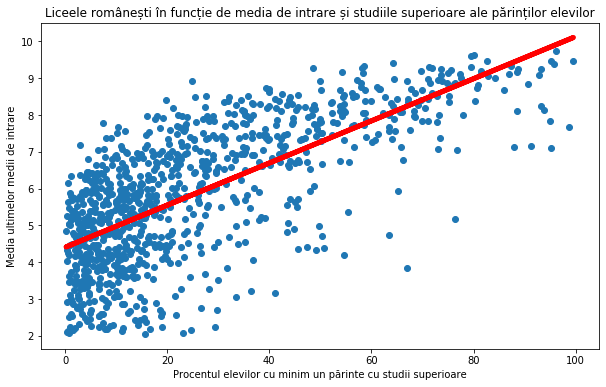

In [10]:
X = []
y = []

for institution in data:
    admission_grades = []
    if institution['objective']['students'].get('parent_studies_percentages'):
        if institution['objective']['students']['parent_studies_percentages'].get('superior_studies'):
            if institution.get('specializations'):
                for specialization in institution['specializations']:
                    admission_grades += [specialization['last_admission_grade']]
                if not np.isnan(np.mean(admission_grades)):
                    X += [institution['objective']['students']['parent_studies_percentages']['superior_studies']]
                    y += [np.mean(admission_grades)]
            
plt.rcParams['font.sans-serif'] = 'Verdana'
plt.figure(figsize=(10,6))
plt.xlabel('Procentul elevilor cu minim un părinte cu studii superioare')
plt.ylabel('Media ultimelor medii de intrare')
plt.title('Liceele românești în funcție de media de intrare și studiile superioare ale părinților elevilor')

model = LinearRegression()
model.fit(np.reshape(X, (-1, 1)), y)
y_pred = model.predict(np.reshape(X, (-1, 1)))

plt.scatter(X, y)
plt.plot(X, y_pred, color='r', linewidth=5.0)
plt.show()

In [11]:
X = []
y = []

for institution in data:
    admission_grades = []
    if institution['objective']['students'].get('parent_studies_percentages'):
        if len(institution['objective']['students']['parent_studies_percentages'].values()) > 0:
            if institution.get('specializations'):
                for specialization in institution['specializations']:
                    admission_grades += [specialization['last_admission_grade']]
                ethnicity = [0 if e == None else e for e in list(institution['objective']['students']['ethnicity_percentages'].values())]
                studies = [0 if e == None else e for e in list(institution['objective']['students']['parent_studies_percentages'].values())]
                medium = [0 if e == 'Rural' else 1 for e in [institution['objective']['location']['medium']]]
                disadvantaged = [0 if e == 'Da' else 1 for e in [institution['objective']['location']['socioeconomically_disadvantaged_area']]]
                if not np.isnan(np.mean(admission_grades)):
                    X += [studies + ethnicity + medium + disadvantaged]
                    y += [np.mean(admission_grades)]
 
model = LinearRegression()
model.fit(X, y)
mean_absolute_error(model.predict(X), y)

0.9711367203597825

### Distribution of variable I82 by county

In [19]:
repeaters = {}

for county in counties:
    repeaters[county] = []
    
for institution in data:
    if institution['objective']['identity'].get('school_type') in ['Liceu teoretic', 'Colegiu Naţional']:
        if institution['objective']['students']['flux'].get('repeaters') and institution['objective']['students']['flux'].get('registered_initially'):
            repeaters[institution['objective']['location'].get('county')] += [institution['objective']['students']['flux'].get('repeaters') / institution['objective']['students']['flux'].get('registered_initially')]
        
for county in counties:
    repeaters[county] = np.mean(repeaters[county]) * 100
    
national = np.mean([repeaters[county] for county in counties if not np.isnan(repeaters[county])])
    
repeaters, national

({'ALBA': nan,
  'ARAD': 1.9073569482288828,
  'ARGEŞ': nan,
  'BACĂU': nan,
  'BIHOR': 2.2966979228649005,
  'BISTRIŢA-NĂSĂUD': nan,
  'BOTOŞANI': 0.8183306055646482,
  'BRAŞOV': 0.33557046979865773,
  'BRĂILA': nan,
  'BUZĂU': nan,
  'CARAŞ-SEVERIN': nan,
  'CLUJ': nan,
  'CONSTANŢA': nan,
  'COVASNA': nan,
  'CĂLĂRAŞI': nan,
  'DOLJ': nan,
  'DÂMBOVIŢA': 0.4818679001996556,
  'GALAŢI': nan,
  'GIURGIU': 0.11918951132300357,
  'GORJ': 0.9808993694376951,
  'HARGHITA': nan,
  'HUNEDOARA': nan,
  'IALOMIŢA': nan,
  'IAŞI': nan,
  'ILFOV': nan,
  'MARAMUREŞ': 2.941176470588235,
  'MEHEDINŢI': 0.8695652173913043,
  'MUNICIPIUL BUCUREŞTI': 0.33670033670033667,
  'MUREŞ': nan,
  'NEAMŢ': 0.0970873786407767,
  'OLT': nan,
  'PRAHOVA': nan,
  'SATU MARE': nan,
  'SUCEAVA': nan,
  'SĂLAJ': nan,
  'TELEORMAN': nan,
  'TIMIŞ': 10.957726537216828,
  'TULCEA': 16.025641025641026,
  'VASLUI': 0.23391812865497078,
  'VRANCEA': nan,
  'VÂLCEA': 3.076923076923077},
 nan)

### Distribution of variable I01 by county

In [21]:
winners = {}

for county in counties:
    winners[county] = []
    
for institution in data:
    if institution['objective']['identity'].get('school_type') in ['Liceu teoretic', 'Colegiu Naţional']:
        if institution['objective']['students']['recognized_awards'] and institution['objective']['students']['student_count']:
            winners[institution['objective']['location'].get('county')] += [institution['objective']['students']['recognized_awards'] / institution['objective']['students']['student_count']]
        
for county in counties:
    winners[county] = np.mean(winners[county])
    
national = np.mean([winners[county] for county in counties if not np.isnan(winners[county])])
    
winners, national

({'ALBA': 0.3258007235390804,
  'ARAD': 0.1250977568409531,
  'ARGEŞ': 0.2228499796052005,
  'BACĂU': 0.19488667462071044,
  'BIHOR': 0.20357216990432314,
  'BISTRIŢA-NĂSĂUD': 0.15214591933558091,
  'BOTOŞANI': 0.30032730727571577,
  'BRAŞOV': 0.1424924249880667,
  'BRĂILA': 0.3435263951043815,
  'BUZĂU': 0.3557323654865876,
  'CARAŞ-SEVERIN': 0.11311734719842409,
  'CLUJ': 0.2416255251602414,
  'CONSTANŢA': 0.251906502414151,
  'COVASNA': 0.24766947510471068,
  'CĂLĂRAŞI': 0.21816188790951965,
  'DOLJ': 0.27371556647118567,
  'DÂMBOVIŢA': 0.2177075778663916,
  'GALAŢI': 0.23812071837668322,
  'GIURGIU': 0.12213645168619736,
  'GORJ': 0.19770862962632174,
  'HARGHITA': 0.17964810455624977,
  'HUNEDOARA': 0.24088766861588404,
  'IALOMIŢA': 0.24807176880109078,
  'IAŞI': 0.35368978249982397,
  'ILFOV': nan,
  'MARAMUREŞ': 0.18877644860819334,
  'MEHEDINŢI': 0.3935011590070937,
  'MUNICIPIUL BUCUREŞTI': 0.12646578397777122,
  'MUREŞ': 0.29729444470693395,
  'NEAMŢ': 0.15134644841311665,
 

### Sum of I75 nationally

In [28]:
absences = 0

for institution in data:
    if institution['objective']['students'].get('absences') and institution['objective']['students']['absences']['total_absences'] != None:
        absences += institution['objective']['students']['absences']['total_absences']
    
absences

40206595.0